In [11]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.colors import ColorConverter
import glob, os

import warnings
warnings.filterwarnings("ignore", message="elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison")

In [139]:
#Table of type codes to characteristics
dico =pd.read_csv("output_dico.csv",index_col="code") #removes # in color
#,converters={"color":lambda x:ColorConverter().to_rgb(x)}

In [140]:
dico.dropna()

,transition_type,fossil_order,color,value
code,,,,
herf_rg,Sequential transitions,Gas cheaper than coal,#1f78b4,40
simu_rg,Overlaping transitions,Gas cheaper than coal,#a6cee3,30
fast_rg,Starting with both,Gas cheaper than coal,#b2df8a,20
befo_rg,Starting with renewable,Gas cheaper than coal,#33a02c,10
no_gc,Using only renewable,,#6a3d9a,0
herf_rc,Sequential transitions,Coal cheaper than gas,#e31a1c,-40
simu_rc,Overlaping transitions,Coal cheaper than gas,#fb9a99,-30
fast_rc,Starting with both,Coal cheaper than gas,#fdbf6f,-20
befo_rc,Starting with renewable,Coal cheaper than gas,#ff7f00,-10


### plot params

In [142]:
font = {'family' : 'serif',
    'weight' : 'normal',
    'size'   : 15}

plt.rc('font', **font)

## Get list of data to plot

In [19]:
subfolders =glob.glob("data/*")

folder = subfolders[1]


#for filename in 
csvlist = glob.glob(folder+"/*.csv")
csvfilename = csvlist[0]
csvfilename
basename = os.path.splitext(os.path.basename(csvfilename))[0]

#empty series
x,y,z,t = pd.Series()

#read the data
data = pd.read_csv(csvfilename)
data.head()

#parse the data
x = x.a data["carbon budget"]
y= 100*data["convexity parameter"]
z= data["Gas resources"]
t = data["transition type"]
t.unique()

SyntaxError: invalid syntax (<ipython-input-19-17e3226ef357>, line 20)

# Plot

### actual plot 

array(['nothing', 'no_gc', 'fast_rg', 'herf_rg', 'simu_rg', 'fast_rc'], dtype=object)

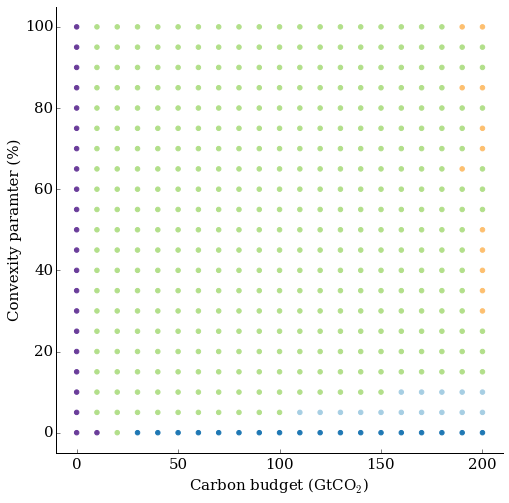

In [144]:
fig = plt.figure(figsize=(8,8))
ax=plt.gca()

ax.scatter(x,y,color=t.replace(dico["color"]),clip_on=False)

plt.xlabel("Carbon budget (GtCO$_2$)")
plt.ylabel("Convexity paramter (%)")

xmarg = (x.max()-x.min())*.05
ymarg = (y.max()-y.min())*.05

plt.xlim(x.min()-xmarg,x.max()+xmarg)
plt.ylim(y.min()-ymarg,y.max()+ymarg)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.savefig(basename+".pdf")
plt.savefig(basename+".png")



### Legend

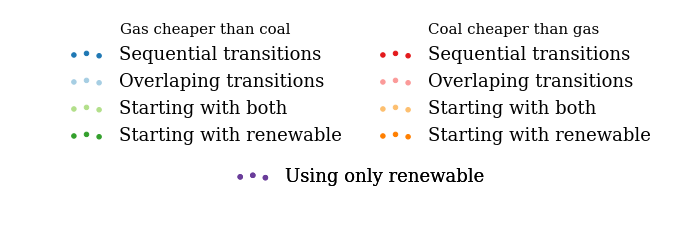

In [145]:
#Create custom artists
plt.figure(figsize=(11,3.5))
ax=plt.gca()

import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

position = {"Gas cheaper than coal":"upper left","Coal cheaper than gas":"upper right"," ":"lower center"}

for marg in ["Gas cheaper than coal","Coal cheaper than gas"," "]:
    
    d = dico.query("fossil_order=='"+marg+"'")
    simArtist =[]
    for i in d.index:
        simArtist.append(plt.scatter(0,0,color=d.ix[i,"color"]));

    #Create legend from custom artist/label lists
    the_legend = plt.legend(simArtist,d.transition_type.tolist(), 
                            numpoints=1,title=marg,loc= position[marg] ,
                           frameon=False)
    ax.add_artist(the_legend)
    plt.setp(the_legend.get_title(),fontsize=15)

    
plt.axis('off')
plt.ylim(0.001)

plt.savefig("transition_types_legend.pdf")


In [146]:
##### PDFCROP and pdf to png (latexscript and imagemagick script)
!pdfcrop transition_types_legend.pdf transition_types_legend.pdf
!convert transition_types_legend.pdf transition_types_legend.png 

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `transition_types_legend.pdf'.
